In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype("float32")
y_data = x_data * 0.1 + 0.3 + np.random.randn(len(x_data))*0.01

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
with tf.device('/cpu:0'):
    W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
    b = tf.Variable(tf.zeros([1]))
    y = tf.mul(W, x_data) + b
    # Minimize the mean squared errors.
    loss = tf.reduce_mean(tf.square(y-y_data))
    optimizer = tf.train.GradientDescentOptimizer(0.5)
    train = optimizer.minimize(loss)

# Before starting, initialize the variables. We will 'run' this first
# init = tf.initialize_all_variables()
init = tf.global_variables_initializer ()

# Launch the graph.
sess = tf.Session()
sess.run(init)
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [-0.34967422] [ 0.80874288]
20 [-0.05563546] [ 0.38856575]
40 [ 0.05893727] [ 0.32367137]
60 [ 0.09152614] [ 0.30521294]
80 [ 0.10079565] [ 0.29996267]
100 [ 0.10343223] [ 0.29846928]
120 [ 0.10418219] [ 0.2980445]
140 [ 0.10439552] [ 0.29792368]
160 [ 0.10445618] [ 0.29788932]
180 [ 0.10447345] [ 0.29787955]
200 [ 0.10447836] [ 0.29787675]


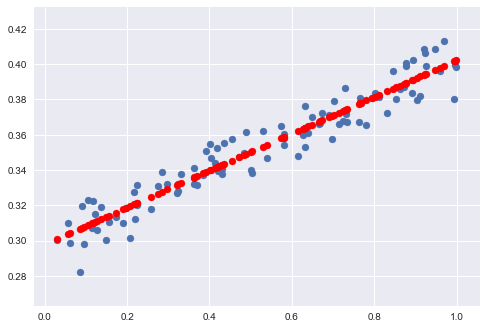

In [3]:
import seaborn as sns
plt.scatter(x_data,y_data)
plt.scatter(x_data,sess.run(W)*x_data+sess.run(b),c='r')
plt.title
plt.show()

(252, 252)
(252, 252)


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


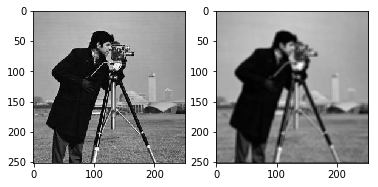

In [7]:
%matplotlib inline
import numpy as np
import os, string
from matplotlib import pyplot as plt
import scipy as sp
import cv2
import tensorflow as tf

img = cv2.imread('camera.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
print(img.shape)
dia = 5
blurKernel = np.ones((dia,dia))/(dia**2.)

from scipy import signal#warning
blurImg = signal.convolve2d(img, blurKernel, mode='same')
print(blurImg.shape)
fig = plt.figure()
ax = fig.add_subplot(121)  
ax.imshow(img,cmap='gray')
ax = fig.add_subplot(122)  
ax.imshow(blurImg,cmap='gray')
fig.show()

$$argmin\frac{1}{2}(AX-B)^2+\lambda X$$

In [41]:
with tf.device('/cpu:0'):
    initial = tf.random_normal([1,252,252,1]) * 0.256
    X = tf.Variable(initial)
    A=tf.placeholder("float", shape=[dia,dia,1,1])
    B=tf.placeholder("float", shape=[1,252,252,1])
    mu = 0.001
    loss = tf.nn.conv2d(X,A,strides=[1,1,1,1],padding='SAME')
    loss = loss - B
    loss = tf.reshape(loss,[252*252,-1])
    X_ravel = tf.reshape(X,[252*252,-1])
    loss = tf.nn.l2_loss(loss)+mu*tf.nn.l2_loss(X_ravel)

In [42]:
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
sess = tf.Session()
#print(sess)
init = tf.global_variables_initializer()
sess.run(init)
blurImg_ravel = blurImg.reshape([252,252,1,1])
blurImg_ravel = blurImg_ravel.transpose(3,0,1,2)
blurKernel_ravel = blurKernel.reshape([dia,dia,1,1])
for step in range(501):
    sess.run(train_op,feed_dict={A: blurKernel_ravel, B:blurImg_ravel})
    if step % 100 == 0:
        print('epoch:',step)

res = sess.run(X)
print(res.shape)

0
100
200
300
400
500
(1, 252, 252, 1)


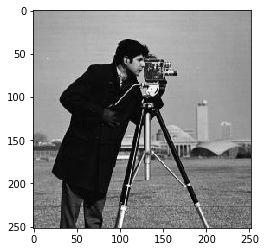

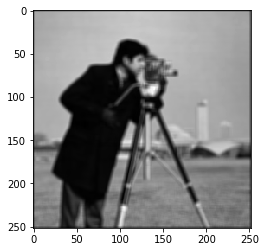

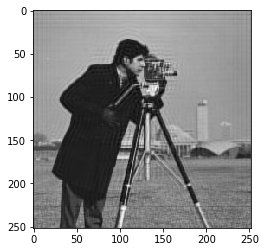

In [43]:
resImg = res.transpose([1,2,3,0])
resImg = resImg.reshape([252,252])
fig = plt.figure()
plt.imshow(img,cmap='gray')
fig = plt.figure()
plt.imshow(blurImg,cmap='gray')
fig = plt.figure()
plt.imshow(resImg,cmap='gray')
plt.show()
# ax = fig.add_subplot(131)  
# ax.imshow(img,cmap='gray')
# ax = fig.add_subplot(132)  
# ax.imshow(blurImg,cmap='gray')
# ax = fig.add_subplot(133)  
# ax.imshow(res,cmap='gray')
# fig.show()

(1, 252, 252, 1)
